In [1]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data_Original = pd.read_csv("BreastCancerData.csv")
data_Original.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# create a subset
data = data_Original.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]]
list(data.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [5]:
nRow, nCol = data.shape
print('There are %d rows and %d columns' % (nRow,nCol))

There are 569 rows and 11 columns


In [6]:
# count the two level values for class
print(data['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [7]:
# check if there is any null data for each column
pd.isnull(data).sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [8]:
data = data.dropna(axis=1)

Text(0.5, 1.0, 'Bar plot of Diagnosis')

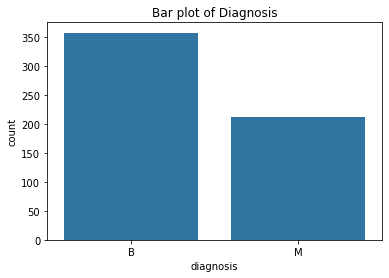

In [9]:
base_color = sns.color_palette()[0]
cat_order = data['diagnosis'].value_counts().index
sns.countplot(data = data, x = 'diagnosis', color = base_color, order = cat_order).set_title('Bar plot of Diagnosis')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

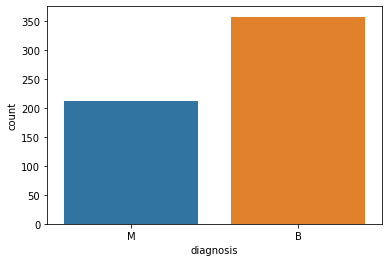

In [10]:
sns.countplot(data['diagnosis'],label="Count")

# Standardization

## Method 1: Using scale formula from textbook

In [21]:
def scaling(data):
    # Drop the response variable diagnosis since we only need to scale numeric variables
    # Store the new dataset to a dataframe called df
    if 'diagnosis' in data.columns:
        data_scale = data.drop('diagnosis', 1)
    else:
        data_scale = data

    # Loop through each column and scale the values
    # write the scaled value back to df
    for col in list(data_scale.columns):
        #print(col)
        data_scale[col] = (data_scale[[col]]-data_scale[[col]].min())/(data_scale[[col]].max()-data_scale[[col]].min())
  
    # print out the scaled dataset
    display(data_scale)
    return(data_scale)

## Method 2: Use package and built-in function 

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def scaling2(data):
    # Creating an instance of the sklearn.preprocessing.MinMaxScaler()
    scaler = MinMaxScaler()
    if 'diagnosis' in data.columns:
        df2 = data.drop('diagnosis', 1)

    # Loop through each column and scale the values using fit_transform function
    # write the scaled value back to df
    for col in list(df2.columns):
        print(col)
        df2[col] = scaler.fit_transform(df2[[col]])
  
    # print out the scaled dataset
    display(df2)
    return df2
    

# Call the scaling function

In [13]:
data_scale = scaling(data)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


# Euclidean distance matrix

In [15]:
def calEuclideanM(data_scale):
    similarity_m = pd.DataFrame(index=range(0,len(data_scale)), columns=range(0,len(data_scale)))

    for i in range(0,len(data_scale)):
        for j in range(0,len(data_scale)):
            #similarity_m.iloc[i,j] = pearsonr(data_scale.iloc[i,:],data_scale.iloc[j,:])[0]
            # subtracting vector
            temp = data_scale.iloc[i,:] - data_scale.iloc[j,:]
 
            # doing dot product to find the sum of the squares
            sum_sq = np.dot(temp.T, temp)
 
            # doing square root to get the Euclidean distance
            dist = np.sqrt(sum_sq)
            similarity_m.iloc[i,j] = dist
            
    display(similarity_m)
    return similarity_m

# call method to calculate the Euclidean distance matrix

In [16]:
similarity_m = calEuclideanM(data_scale)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,0.0,1.127475,0.736053,0.806489,0.805879,0.770998,1.022398,0.900983,0.73082,0.764777,...,1.28199,1.29258,1.78065,0.838165,0.636349,0.931854,1.122759,1.268293,0.707394,1.760886
1,1.127475,0.0,0.549816,1.491499,0.399938,0.922261,0.248594,0.806237,0.951968,1.092831,...,0.812143,0.677906,1.014403,0.919783,0.921377,0.598344,0.430386,0.500456,1.154441,1.128889
2,0.736053,0.549816,0.0,1.163972,0.322188,0.749446,0.438685,0.71036,0.665267,0.813559,...,0.913744,0.810475,1.288251,0.593069,0.44121,0.315303,0.414326,0.681087,0.659119,1.382179
3,0.806489,1.491499,1.163972,0.0,1.309657,0.700373,1.315442,0.806598,0.627659,0.528064,...,1.242249,1.294,1.745285,0.854936,1.099936,1.403336,1.416782,1.410269,1.056902,1.677863
4,0.805879,0.399938,0.322188,1.309657,0.0,0.801285,0.374926,0.792435,0.820109,0.948008,...,0.903753,0.837736,1.252078,0.801735,0.647461,0.379303,0.504205,0.696469,0.899827,1.346938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.931854,0.598344,0.315303,1.403336,0.379303,0.984697,0.558982,0.961878,0.925601,1.038911,...,1.042108,0.944574,1.35659,0.788713,0.518387,0.0,0.412879,0.766319,0.762958,1.515128
565,1.122759,0.430386,0.414326,1.416782,0.504205,0.937851,0.352634,0.808759,0.867252,0.983203,...,0.80186,0.630746,1.026241,0.692247,0.717493,0.412879,0.0,0.410035,0.913149,1.209346
566,1.268293,0.500456,0.681087,1.410269,0.696469,0.862576,0.354974,0.692957,0.843794,0.925873,...,0.47778,0.296278,0.6435,0.719374,0.993957,0.766319,0.410035,0.0,1.162773,0.824799
567,0.707394,1.154441,0.659119,1.056902,0.899827,1.057287,1.038581,1.051255,0.860755,0.866764,...,1.336487,1.267607,1.75346,0.628757,0.278757,0.762958,0.913149,1.162773,0.0,1.828691


In [17]:
euclidean_m = similarity_m

# Scale the values in Euclidean distance matrix from 0 to 1

In [22]:
euclidean_m_scale = scaling(euclidean_m)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,0.0,0.755934,0.532531,0.438997,0.581729,0.485251,0.729008,0.577593,0.489101,0.487162,...,0.711318,0.744795,0.797813,0.62462,0.376881,0.597088,0.740296,0.781194,0.386831,0.762771
1,0.633181,0.0,0.397789,0.81187,0.288698,0.580453,0.177257,0.516855,0.637104,0.696131,...,0.450621,0.390615,0.454499,0.685444,0.54569,0.38339,0.283777,0.308251,0.631294,0.489006
2,0.413362,0.368633,0.0,0.633586,0.232573,0.471687,0.312799,0.45539,0.44523,0.518236,...,0.506995,0.467002,0.577195,0.441969,0.261309,0.202031,0.273188,0.41951,0.360432,0.598725
3,0.452918,1.0,0.842128,0.0,0.945383,0.440801,0.937959,0.517086,0.420061,0.336376,...,0.689268,0.745613,0.781968,0.637118,0.651442,0.899192,0.934162,0.868643,0.577955,0.726808
4,0.452576,0.268145,0.233101,0.712887,0.0,0.504313,0.267336,0.508006,0.548858,0.603879,...,0.501451,0.48271,0.560988,0.597472,0.383462,0.24304,0.33245,0.428984,0.49206,0.583459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.523322,0.401169,0.22812,0.76388,0.273802,0.619749,0.398575,0.616631,0.619459,0.661784,...,0.578218,0.544271,0.607815,0.587767,0.307017,0.0,0.272234,0.472008,0.417215,0.656315
565,0.630533,0.288559,0.299763,0.771199,0.363963,0.590265,0.251441,0.518472,0.580408,0.626298,...,0.444915,0.363441,0.459803,0.515879,0.424938,0.264553,0.0,0.252557,0.499345,0.523858
566,0.712264,0.335539,0.492763,0.767654,0.50275,0.542889,0.253109,0.444234,0.564709,0.58978,...,0.265098,0.170718,0.288317,0.536094,0.588676,0.491021,0.270358,0.0,0.63585,0.357282
567,0.397267,0.774014,0.47687,0.575305,0.649545,0.665436,0.740547,0.673928,0.57606,0.552127,...,0.741556,0.730405,0.78563,0.468565,0.165095,0.488868,0.602089,0.7162,0.0,0.792143


In [23]:
# store the euclidean_m_scale matrix to a csv file
euclidean_m_scale.to_csv('tumor_euclidean_matrix.csv', encoding='utf-8')

# The cosine similarity matrix

In [27]:
def calCosM(data_scale):
    similarity_m = pd.DataFrame(index=range(0,len(data_scale)), columns=range(0,len(data_scale)))

    for i in range(0,len(data_scale)):
        for j in range(0,len(data_scale)):
            a = data_scale.iloc[i,:]
            b = data_scale.iloc[j,:]
            
            similarity_m.iloc[i,j] = np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) )
            
    display(similarity_m)
    return similarity_m

In [28]:
cosine_m = calCosM(data_scale)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,1.0,0.815369,0.925472,0.911263,0.918401,0.944224,0.874717,0.905227,0.933531,0.919363,...,0.807911,0.75941,0.333931,0.897302,0.943801,0.869145,0.803835,0.758137,0.942099,0.357245
1,0.815369,1.0,0.94772,0.63807,0.963525,0.744009,0.980508,0.799307,0.769207,0.712759,...,0.762486,0.840596,0.585026,0.814948,0.913178,0.95318,0.959243,0.916777,0.881097,0.432744
2,0.925472,0.94772,1.0,0.799345,0.981049,0.878206,0.986151,0.893292,0.905829,0.862901,...,0.865879,0.886515,0.57289,0.929141,0.987461,0.982436,0.965092,0.924963,0.976521,0.475489
3,0.911263,0.63807,0.799345,1.0,0.73678,0.978295,0.745939,0.95316,0.967797,0.979287,...,0.874623,0.789009,0.435847,0.901115,0.836536,0.705279,0.684663,0.69621,0.865246,0.556054
4,0.918401,0.963525,0.981049,0.73678,1.0,0.832112,0.974911,0.834019,0.841071,0.798733,...,0.791854,0.814475,0.47925,0.863415,0.96627,0.980871,0.938328,0.877422,0.939325,0.335887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.869145,0.95318,0.982436,0.705279,0.980871,0.803882,0.976187,0.814599,0.831418,0.791226,...,0.833356,0.855347,0.587055,0.882429,0.967688,1.0,0.973622,0.920525,0.943641,0.404889
565,0.803835,0.959243,0.965092,0.684663,0.938328,0.77365,0.983074,0.831099,0.824365,0.785426,...,0.872472,0.926309,0.733804,0.899722,0.945772,0.973622,1.0,0.982041,0.931581,0.56733
566,0.758137,0.916777,0.924963,0.69621,0.877422,0.76167,0.95445,0.844137,0.824564,0.804356,...,0.911017,0.965126,0.828534,0.916645,0.916802,0.920525,0.982041,1.0,0.916036,0.686474
567,0.942099,0.881097,0.976521,0.865246,0.939325,0.905661,0.947937,0.914362,0.941185,0.930509,...,0.914112,0.893326,0.591762,0.979262,0.994503,0.943641,0.931581,0.916036,1.0,0.554227


In [29]:
# store the cosine similarity matrix to a csv file
cosine_m.to_csv('tumor_cosine_matrix.csv', encoding='utf-8')

# Pearson correlation between each feature

In [15]:
from scipy.stats import pearsonr
similarity_data = pd.DataFrame(index=data.columns, columns=data.columns)

for i in range(1,len(data.columns)):
    for j in range(1,len(data.columns)):
        similarity_data.iloc[i,j] =  pearsonr(data.iloc[:,i],data.iloc[:,j])[0]

In [37]:
display(similarity_data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,1.0,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,NaN,0.323782,1.0,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,NaN,0.997855,0.329533,1.0,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,NaN,0.987357,0.321086,0.986507,1.0,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311
smoothness_mean,NaN,0.170581,-0.023389,0.207278,0.177028,1.0,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,NaN,0.506124,0.236702,0.556936,0.498502,0.659123,1.0,0.883121,0.831135,0.602641,0.565369
concavity_mean,NaN,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.0,0.921391,0.500667,0.336783
concave points_mean,NaN,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.0,0.462497,0.166917
symmetry_mean,NaN,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.0,0.479921


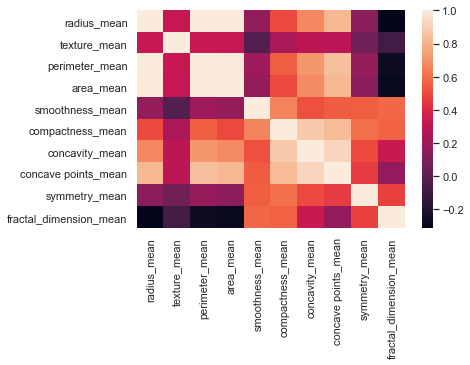

In [39]:
corrMatrix = data.corr()
#print(corrMatrix)
sns.heatmap(corrMatrix, annot=False)
plt.show()

# Scatter plots for understanding relationship between features

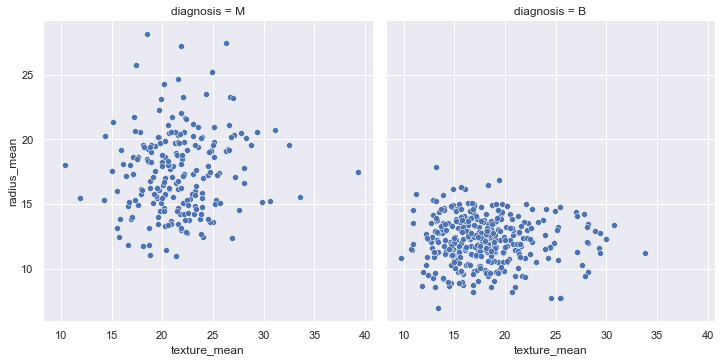

In [38]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=data,
    x="texture_mean", y="radius_mean", col="diagnosis",
    
)

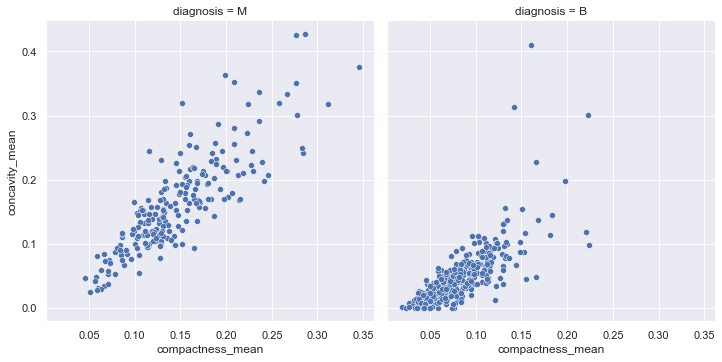

In [57]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=data,
    x="compactness_mean", y="concavity_mean", col="diagnosis",
    
)

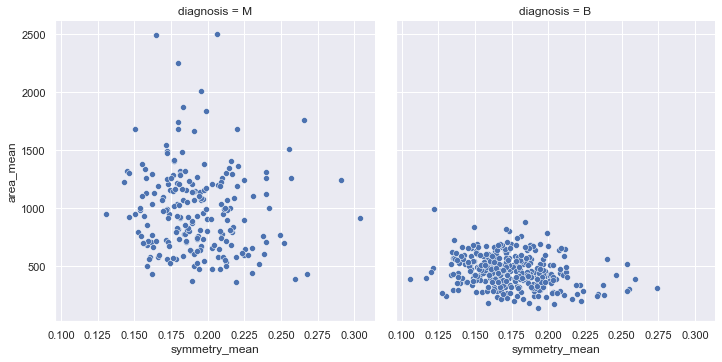

In [56]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=data,
    x="symmetry_mean", y="area_mean", col="diagnosis",
    
)

# Boxplot for understanding relationship

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

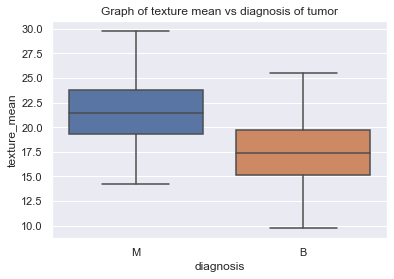

In [40]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x=data["diagnosis"], y=data["texture_mean"], data=data, showfliers=False)
plot.set_title("Graph of texture mean vs diagnosis of tumor")

Text(0.5, 1.0, 'Graph of radius mean vs diagnosis of tumor')

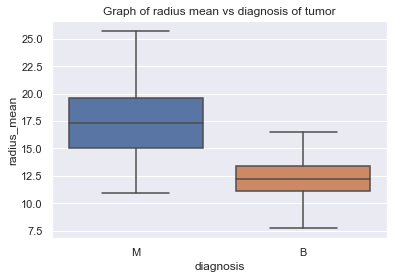

In [41]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x=data["diagnosis"], y=data["radius_mean"], data=data, showfliers=False)
plot.set_title("Graph of radius mean vs diagnosis of tumor")

Text(0.5, 1.0, 'Graph of smoothness mean vs diagnosis of tumor')

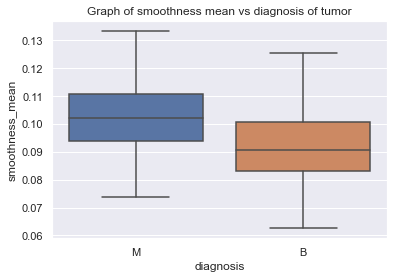

In [42]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x=data["diagnosis"], y=data["smoothness_mean"], data=data, showfliers=False)
plot.set_title("Graph of smoothness mean vs diagnosis of tumor")

Text(0.5, 1.0, 'Graph of fractal_dimension mean vs diagnosis of tumor')

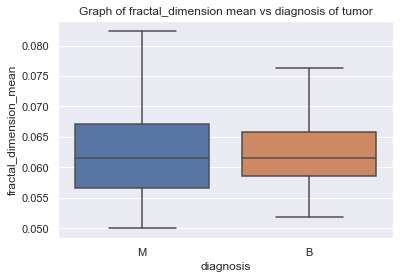

In [43]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x=data["diagnosis"], y=data["fractal_dimension_mean"], data=data, showfliers=False)
plot.set_title("Graph of fractal_dimension mean vs diagnosis of tumor")